In [42]:
import os
import utm
import gdal
import time
import warnings
from osgeo import gdal
from osmapi import OsmApi
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
# GDAL does not use python exceptions by default
gdal.UseExceptions()

In [26]:
#run this to get something we can render or use the visual product
#gdal_translate -ot Byte -scale 0 4096 0 255 /home/kat/code/hacking/osm/20170222_231253_0c27/20170222_231253_0c27_3B_AnalyticMS.tif test.tif

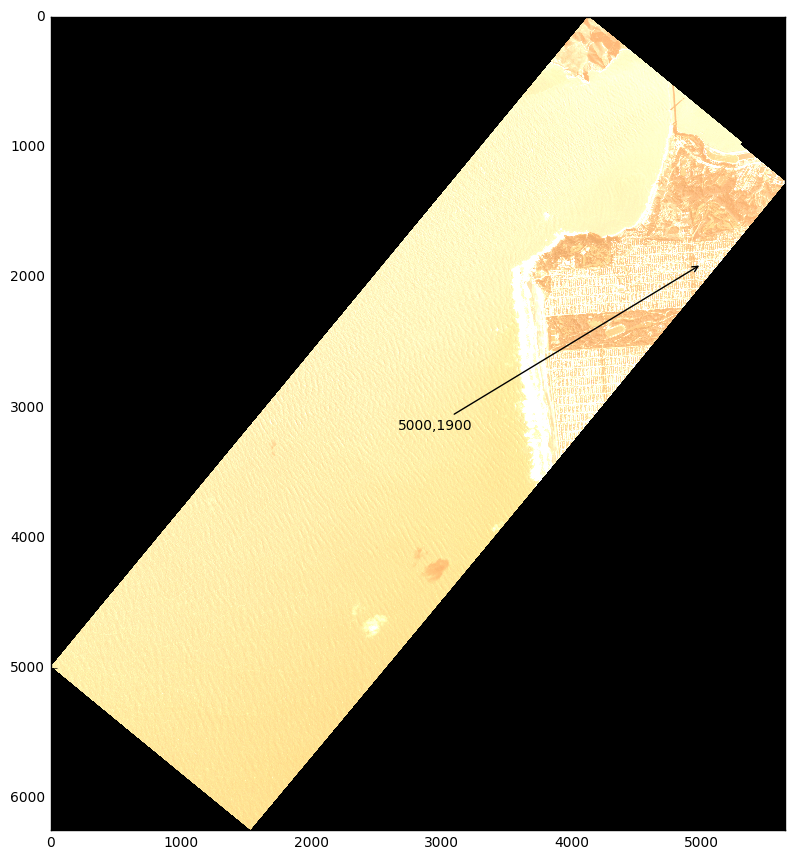

In [58]:
fname = "/home/kat/code/hacking/osm/20170222_231253_0c27/20170222_231253_0c27_3B_AnalyticMS.tif"
infile = "/home/kat/code/hacking/osm/test.tif"
gtif = gdal.Open(infile)
gtif.GetProjectionRef()
arr = gtif.ReadAsArray()
#trans = gtif.GetGeoTransform()
#extent = (trans[0], trans[0] + gtif.RasterXSize*trans[1],
#          trans[3] + gtif.RasterYSize*trans[5], trans[3])
pos = [5000,1900] # this is the pixel we want info about
plt.imshow(arr[:3,:,:].transpose((1, 2, 0)))#, extent=extent)
fig = plt.gcf()
plt.annotate("{0},{1}".format(pos[0],pos[1]), xy=pos, xycoords='data',
             xytext=(0.5, 0.5), textcoords='figure fraction',
             arrowprops=dict(arrowstyle="->"))
fig.set_size_inches(18.5, 10.5)
plt.show()

In [59]:
def pixel2utm(ds, x, y):
    """
    Returns utm coordinates from pixel x, y coords
    """
    xoff, a, b, yoff, d, e = ds.GetGeoTransform()
    xp = a * x + b * y + xoff
    yp = d * x + e * y + yoff
    return(xp, yp)

In [60]:
ds = gdal.Open(infile)
# take the GDAL info and make it into UTM
my_utm = pixel2utm(ds,pos[0],pos[1])
# convert UTM into Lat Long
# need to figure out how to get zone info
my_lla = utm.to_latlon(my_utm[0],my_utm[1],10,"N")
# do the lat long look up from OSM
geolocator = Nominatim()
# reverse look up the are based on lat lon
location = geolocator.reverse("{0},{1}".format(my_lla[0],my_lla[1]))
# print location info
print location.address
print location.raw
# get the OSM ID info
osm_id = int(location.raw["place_id"])
print osm_id
# create an interface to the OSM API
MyApi = OsmApi()
# Look up our position 
print MyApi.NodeGet(osm_id)


Be My Guest, Clement Street, Richmond District, SF, California, 94121, United States of America
{u'display_name': u'Be My Guest, Clement Street, Richmond District, SF, California, 94121, United States of America', u'place_id': u'4180952', u'lon': u'-122.4696221', u'boundingbox': [u'37.7824821', u'37.7826821', u'-122.4697221', u'-122.4695221'], u'osm_type': u'node', u'licence': u'Data \xa9 OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', u'osm_id': u'448036308', u'lat': u'37.7825821', u'address': {u'city': u'SF', u'restaurant': u'Be My Guest', u'country': u'United States of America', u'county': u'SF', u'state': u'California', u'road': u'Clement Street', u'country_code': u'us', u'neighbourhood': u'Richmond District', u'postcode': u'94121'}}
4180952
None


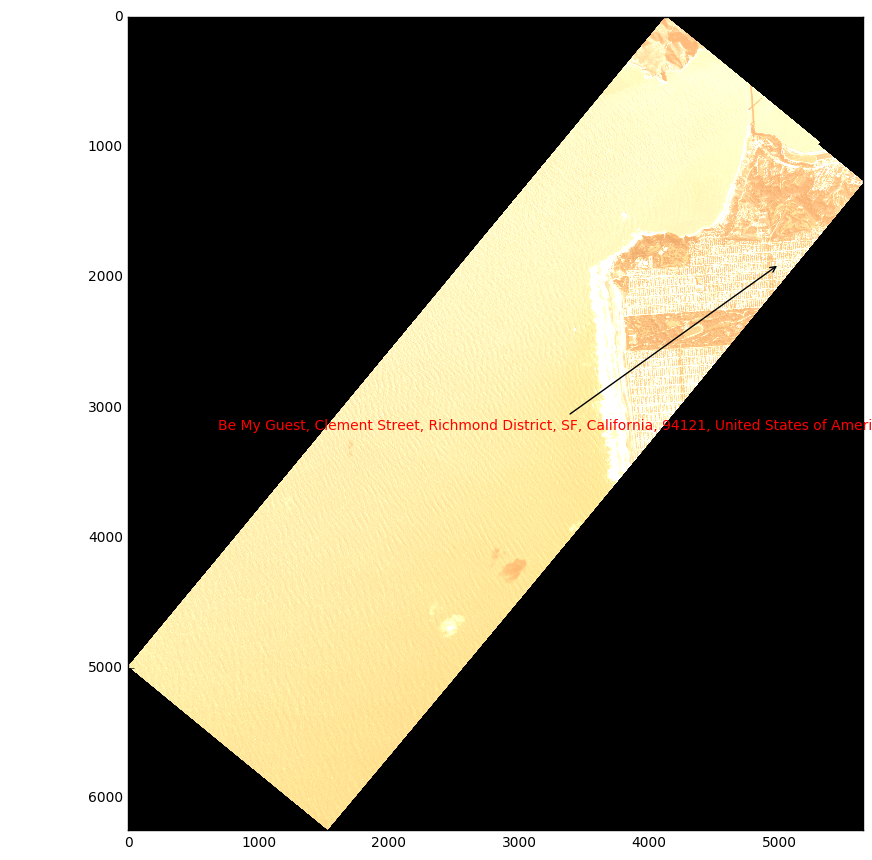

In [61]:
plt.imshow(arr[:3,:,:].transpose((1, 2, 0)))#, extent=extent)
fig = plt.gcf()
plt.annotate(location.address, xy=pos, xycoords='data',
             xytext=(0.25, 0.5), textcoords='figure fraction',color="red",
             arrowprops=dict(arrowstyle="->"))
fig.set_size_inches(18.5, 10.5)
plt.show()